<img height="120" src="https://raw.githubusercontent.com/joaquinzepeda/Programacion-Avanzada/main/imgs/cropped-logo-fcfm-die-1.png">

# **Aux Primer desafío**
## Profesor *Alberto Castro*
### Por *Joaquín Zepeda*

**Periodo**: Primavera 2022 . **Repositorio del curso:** <a href="https://github.com/joaquinzepeda/Programacion-Avanzada.git"><img height="30" src="https://cdn-icons-png.flaticon.com/512/25/25231.png"></a>  


# Tiempo de ejecución de cada celda en Colab con ipython-autotime

In [ ]:
# Para medir tiempo de ejecucion 
!pip install ipython-autotime

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.6 MB 14.7 MB/s 


In [ ]:
# Extensiones
%load_ext autotime

time: 330 µs (started: 2022-08-24 05:34:15 +00:00)


# K means

K-means es uno de los métodos más populares de Clustering no supervisado (los datos no tienen etiqueta cuando se realiza el algoritmo), esto gracias a su simplicidad. K-means permite determinar k centroides que se utilizan para definir los clusters, de esta manera se pueden clasificar los datos dependiendo de sus distancias al centroide. Es un algoritmo iterativo que comienza con centroides ubicados de forma aleatoria y que van moviéndose buscando minimizar las distancias de los elementos del cluster al centroide (a medida que se mueven los centroides también cambian los elementos que pertenecen a ese respectivo cluster). 
 
Veamos una animación para poder comprender de mejor manera como va iterando el algoritmo:
<img src="https://upload.wikimedia.org/wikipedia/commons/e/ea/K-means_convergence.gif">
 
En este ejemplo existen 3 clusters representados por los 3 colores, y los centroides corresponden a las cruces de color negro que se van moviendo. 





# Objetivo del desafío

### "Comparar los tiempos de ejecución del método de k-means, con C++ y Python." 
 
La idea es que comparen los tiempos ejecuta n veces( mínimo de 100 veces) cada método **en las mismas condiciones**, es decir con el mismo conjunto de datos y el mismo número de iteraciones. Recomiendo determinar un tiempo promedio de las n ejecuciones, pues estos datos permiten analizar los resultados de forma más representativa. Por otro lado si lo desean igual pueden obtener otras métricas como el mínimo, el máximo, la mediana, etc. **No mida el tiempo en graficar**, los gráficos son algo extra, no se deben considerar cuando se comparan los tiempos. 


# Dataset

Generamos un dataset aleatorio utilizando la libreria sklearn como se muestra a continuación:

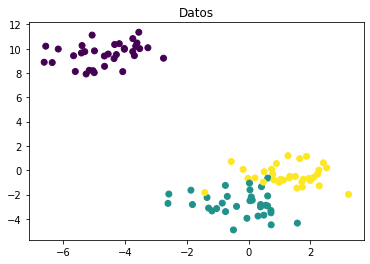

In [ ]:
import sklearn.datasets
import sklearn.cluster
import pandas as pd
import matplotlib.pyplot as plt
n = 100
k = 3

# data correpsonde a los puntos y
# labels nos indica la clase que pertenece (el color en caso de graficar)

data, labels = sklearn.datasets.make_blobs(
    n_samples=n, n_features=2, centers=k)

plt.scatter(data[:, 0], data[:, 1], c=labels)
plt.title("Datos")
plt.show()

In [ ]:
# una muestra de los datos
data[0:5]

array([[-4.37857472, -8.07731489],
       [-4.51672873, -8.27245919],
       [ 0.49867004,  4.50848147],
       [ 0.01843911,  4.16278805],
       [ 1.05607432,  4.87941503]])

time: 15.8 ms (started: 2022-08-24 00:24:43 +00:00)


# Guardar datos

## Como csv
Guardamos los datos en un archivo .csv para después utilizarlo. Esto se puede realizar de forma simple con numpy y tambien con pandas (hay otras formas de escribir archivos, pero estas me gustan). 

In [ ]:
import pandas as pd
pd.DataFrame(data).to_csv('data_pd.csv', index=None)
pd.DataFrame(data).head()

,0,1
0,-4.378575,-8.077315
1,-4.516729,-8.272459
2,0.498670,4.508481
3,0.018439,4.162788
4,1.056074,4.879415


time: 36.2 ms (started: 2022-08-24 00:24:48 +00:00)


## Como txt 

In [ ]:
import numpy as np
np.savetxt('data_np.txt', data, delimiter=" ")

time: 4.44 ms (started: 2022-08-24 00:24:50 +00:00)


# Leer datos en Python

In [ ]:
data_np = np.genfromtxt('data_np.csv', delimiter=',')
data_np[0:5]

array([[ 5.25744753,  3.79102463],
       [ 4.03989802, -2.66055944],
       [ 0.60626355,  4.7530844 ],
       [ 3.41370312, -2.6460803 ],
       [ 3.09182449, -3.91288925]])

time: 14.7 ms (started: 2022-08-24 00:24:52 +00:00)


Ojo que con pandas se lee como DataFrame, por lo que habría que pasarlo a numpy para trabajar.

In [ ]:
data_pd = pd.read_csv("data_pd.csv")
data_pd[0:5]

,0,1
0,-4.378575,-8.077315
1,-4.516729,-8.272459
2,0.498670,4.508481
3,0.018439,4.162788
4,1.056074,4.879415


time: 28.2 ms (started: 2022-08-24 00:24:54 +00:00)


# Parte 1: C++/C++ en Python

Para la parte $1$ existen 2 alternativas, la opción $1.1$ y la opción $1.2$ que se muestran a continuación:

## $1.1$ Realización y ejecución del método k-means en C++





De los códigos de ejemplo dejados por el profesor en las instrucciones, se destacan algunas cosas útiles que **vamos a revisar y probar en el auxiliar**.    


## Leer los datos desde un Archivo .txt en C++

C++ proporciona las siguientes clases para realizar la salida y entrada de caracteres para leer y escribir archivos:

* ofstream: Stream class to write on files \\
* ifstream: Stream class to read from files \\
* fstream: Stream class to both read and write  from/to files. \\

A continuación se presenta un ejemplo para leer puntos, para más información ver la [documentación](https://cplusplus.com/doc/tutorial/files/) (en general leer lineas es lo más típico).

```cpp
// g++ leer_datos.cpp -o ejemplo && ./ejemplo <nombre_archivo>

#include <iostream>
#include <fstream>
#include <sstream>
#include <vector>

struct Point {
  float x{0}, y{0};
};

using DataFrame = std::vector<Point>;

/*
leer_datos.cpp

Programa que lee puntos desde un archivo .txt en C++ (considerando los datos separados por un espacio)
*/
int main(int argc, char **argv){

    if (argc < 1) {
    std::cerr << "falta escribir el nomrbe del archivo.\n usage: ./ejemplo <nombre_archivo>"
              << std::endl;
    std::exit(EXIT_FAILURE);
  }

    DataFrame data;
    std::ifstream stream(argv[1]);
    if (!stream) {
        std::cerr << "Could not open file: " << argv[1] << std::endl;
        std::exit(EXIT_FAILURE);
  }

    std::string line;
    while (std::getline(stream, line)) {
        Point point;
        std::istringstream line_stream(line);
        size_t label;
        line_stream >> point.x >> point.y >> label;
        data.push_back(point);
    }

    std::cout << "Ejemplo de acceso a los puntos: " << "\n";
    std::cout << data[0].x << " " << data[0].y << "\n";
    return 0;
}
```



## Función main()
Es la que ejecuta nuestro programa. (Pseudo código)

```cpp
int main(int argc, const char* argv[]) {
  DataFrame means;
  double total_elapsed = 0;
  for (int run = 0; run < number_of_runs; ++run) {
    const auto start = std::chrono::high_resolution_clock::now();
    means = k_means(data, k, iterations);
    const auto end = std::chrono::high_resolution_clock::now();
    const auto duration =
        std::chrono::duration_cast<std::chrono::duration<double>>(end - start);
    total_elapsed += duration.count();
  }
  std::cerr << "Took: " << total_elapsed / number_of_runs << "s ("
            << number_of_runs << " runs)" << std::endl;

  for (auto& mean : means) {
    std::cout << mean.x << " " << mean.y << std::endl;
  }
```

## $1.2$ Realización y ejecución del método k-means usando una libreria de C++ en Python.

Veamos como utilizar mlpack, una librería de machine learning rápida y flexible escrita en C++.

# Instalar la librería

In [ ]:
!pip install mlpack3

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 93.0 MB 1.2 MB/s 


## Ejemplo de uso mlpack

[Ver documentación](https://www.mlpack.org/doc/mlpack-3.1.1/python_documentation.html#kmeans).

Tabla que describe algunos de los parámetros que recibe la función k-means implementada en esta librería.

| name |	type |	description	default|
 |   --    |  --      |      --          | 
|algorithm|	str|	Algorithm to use for the Lloyd iteration (‘naive’, ‘pelleg-moore’, ‘elkan’, ‘hamerly’, ‘dualtree’, or ‘dualtree-covertree’).	'naive'|
|clusters |	int|	Number of clusters to find (0 autodetects from initial centroids).	required |
|initial_centroids	|matrix|	Start with the specified initial centroids.	np.empty([0, 0])|
|max_iterations |	int	|Maximum number of iterations before k-means terminates.	1000|
|seed|	int	|Random seed. If 0, ‘std::time(NULL)’ is used.	0|
|verbose	|bool |	Display informational messages and the full list of parameters and timers at the end of execution.	False|

In [ ]:
from mlpack import kmeans

d = kmeans( clusters=3, input=data, max_iterations=300)
centroid = d['centroid']
output = d['output'] # a que clase clasifica cada valor

time: 2.68 ms (started: 2022-08-24 05:34:30 +00:00)


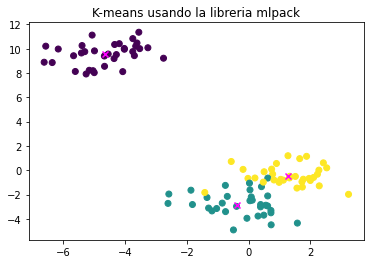

time: 128 ms (started: 2022-08-24 05:34:32 +00:00)


In [ ]:
plt.scatter(data[:, 0], data[:, 1], c=labels)
plt.scatter(centroid[:, 0], centroid[:, 1], linewidths=3, c='magenta',marker='x')
plt.title("K-means usando la libreria mlpack")
plt.show()

# Otra alternativa: Cython
Cython es una forma de escribir código en C/C++ con Python, esta tiene una sintaxis similar a la de C/C++ pero tambien es similar Python.
Más información ver la [documentación](https://cython.readthedocs.io/en/latest/src/tutorial/cython_tutorial.html), además recomiendo el siguiente [tutorial](https://nyu-cds.github.io/python-cython/01-syntax/).

## Definir variables

A diferencia de Python, para definir variables en C/C++ es necesario explicitar el tipo de la variable cuando se inicializa, por ejemplo:

```cpp
int val = 8;
```
Luego para hacer lo mismo en Cython se utiliza una palabra clave llamada "cdef", luego se explicita el tipo de la variable y luego lo de siempre.
```python
import cython

cdef int val = 8
```

## Definir funciones en C++

Para definir funciones es necesario explicitar el tipo que retorna la función antes del nombre de esta, veamos un ejemplo:
```cpp
int my_funcion(long l, float f):
    ...
```
Luego para hacer lo mismo en Cython se hace de forma similar a lo anterior:

```python
cdef int cy_funcion(int n):
    ...

def funcion(int n):
    cy_funcion(n)

```
Para llamar a la función definimos una auxiliar.

## Ejemplo uso Cython

Ejemplo a partir de un tutorial 

In [2]:
%load_ext cython

In [11]:
%%cython

# - python version
def py_sum(n):
  """Compute the sum"""
  i = 0
  the_sum = 0
  for i in range(n):
    the_sum += i
  return the_sum

# - cython version
cdef int cy_sum(int n):
  cdef int i = 0
  cdef int the_sum = 0
  for i in range(n):
    the_sum += i
  return the_sum

def cy_contenedor(int n):
  return cy_sum(n)

## Comparando los tiempos

In [12]:
print("python time complexity")
%timeit py_sum(100000000)
print('\n')

print('cython time complexity')
%timeit cy_contenedor(100000000)
print('\n')

python time complexity
4.22 s ± 27.6 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


cython time complexity
38.9 ms ± 363 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)




## Usando Python sum y Numpy

In [13]:
import numpy as np

print("python sum function")
%timeit sum(range(1,100000000))
print('\n')

print("numpy sum")
%timeit np.sum(range(1, 100000000))

python sum function
1.99 s ± 52.3 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


numpy sum
10.9 s ± 179 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


## Promedio y desviación 100 iteraciones

In [15]:
print("python time complexity")
%timeit -r100 py_sum(10000) 
print('\n')

print('cython time complexity')
%timeit -r100 cy_contenedor(10000) 
print('\n')

python time complexity
353 µs ± 9.24 µs per loop (mean ± std. dev. of 100 runs, 1000 loops each)


cython time complexity
3.98 µs ± 44.8 ns per loop (mean ± std. dev. of 100 runs, 100000 loops each)




# Parte 2: Python sin librerías

$2.$ Realización y ejecución del método k-means en Python, sin uso de librerías. Recomiendo revisar las referencias en las instrucciones, los pseudos códigos, las clases del Profesor, etc.

In [ ]:
def nuestro_kmeans(data, k, iter=300):

    # AQUI EL CODIGO
    pass
    #return clusters

means = nuestro_kmeans(data,k,300)

time: 1.44 ms (started: 2022-08-24 00:27:43 +00:00)


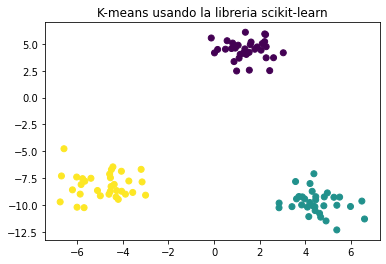

time: 172 ms (started: 2022-08-24 00:28:01 +00:00)


In [ ]:
import matplotlib.pyplot as plt

plt.scatter(data[:, 0], data[:, 1], c=labels)
plt.scatter(means[:, 0], means[:, 1], linewidths=2)
plt.title("K-means usando la libreria scikit-learn")
plt.show()

# Parte 3: Python con librerías

$3.$ Realización y ejecución del método k-means en Python con uso de librerías, por ejemplo con scikit-learn.


In [ ]:
import sklearn.datasets
import sklearn.cluster
import scipy.cluster.vq


n = 100
k = 3

# scipy
means, _ = scipy.cluster.vq.kmeans(data, k, iter=300)

time: 107 ms (started: 2022-08-24 05:34:44 +00:00)


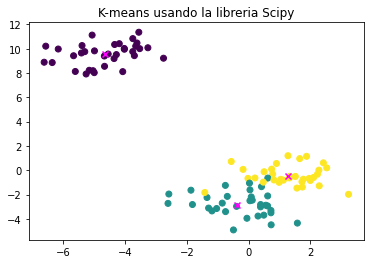

time: 122 ms (started: 2022-08-24 05:34:46 +00:00)


In [ ]:
plt.scatter(data[:, 0], data[:, 1], c=labels)
plt.scatter(means[:, 0], means[:, 1], linewidths=3, c='magenta',marker='x')
plt.title("K-means usando la libreria Scipy")
plt.show()

In [ ]:
# scikit-learn
kmeans = sklearn.cluster.KMeans(k, max_iter=300)
kmeans.fit(data)
means = kmeans.cluster_centers_

time: 21.9 ms (started: 2022-08-24 05:34:50 +00:00)


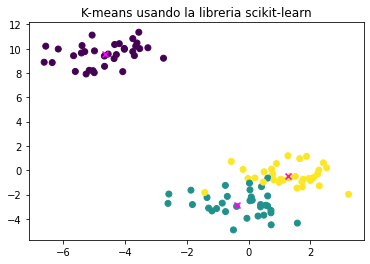

time: 124 ms (started: 2022-08-24 05:34:51 +00:00)


In [ ]:
plt.scatter(data[:, 0], data[:, 1], c=labels)
plt.scatter(means[:, 0], means[:, 1], linewidths=2, c='magenta',marker='x')
plt.title("K-means usando la libreria scikit-learn")
plt.show()